<a href="https://colab.research.google.com/github/rameez16/Hubdemo/blob/main/Online_Retail_Clustoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Online Retail Data Clustoring


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**gg    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [112]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import difflib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [113]:
# Load Datas
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive

drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/Copy of Online Retail.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [114]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [115]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [116]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [117]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

In [118]:
df_duplicated=df[df.duplicated()]
df_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268 entries, 517 to 541701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5268 non-null   object        
 1   StockCode    5268 non-null   object        
 2   Description  5268 non-null   object        
 3   Quantity     5268 non-null   int64         
 4   InvoiceDate  5268 non-null   datetime64[ns]
 5   UnitPrice    5268 non-null   float64       
 6   CustomerID   5225 non-null   float64       
 7   Country      5268 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 370.4+ KB


#### Missing Values/Null Values

In [119]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [120]:
# Visualizing the missing values

### What did you know about your dataset?

* Data set has 541909 rows and 8 columns.
* Dataset contains 5268 duplicate values.
* Null values : Description column -1454, Customer ID column-135080
* Data Types : Datetime-1 column, Float-2 column, Int-1 column, Object-4.
* Rows Represent all informations of each item sold.not final transaction.



## ***2. Understanding Your Variables***

In [121]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [122]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations
-------------------
* Minimum quantity and price has negative values.Which need to be investigated.
* Maximum Quantity is 80995.0 which is unrealistc for retail store
* Maximum Unit price 38970$ which need to be investigated
* 38 unique contries.Possibly multiple currencies.
* 4070 unique products but 4223 unique descriptions . this discriptancy need to be investigated.
* Total 25900 unique invoice no . So 25900 possible transactions.

### Variables Description

Answer Here
## 🧾 Dataset Column Descriptions

| **Column**      | **Description**                                                   |
|-----------------|-------------------------------------------------------------------|
| `InvoiceNo`     | Unique identifier for each invoice/transaction                    |
| `StockCode`     | Product/item code                                                 |
| `Description`   | Name/description of the item                                      |
| `Quantity`      | Number of items purchased                                         |
| `InvoiceDate`   | Date and time of the invoice                                      |
| `UnitPrice`     | Price per item (in the currency of the store)                     |
| `CustomerID`    | Unique ID for each customer (may have missing values)             |
| `Country`       | Country where the invoice was made                                |


### Check Unique Values for each variable.

In [123]:
# Check Unique Values for each variable.
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [124]:
# Write your code to make your dataset analysis ready.

#Droped the duplicates

df_copy=df.copy()

df_copy.drop_duplicates(keep='first')

df_copy.reset_index()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [125]:
df_copy['Description'].fillna('Unknown')

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [126]:
df_copy['CustomerID'].dropna()
df_copy.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [127]:
df_copy[df_copy['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Negative qantity seems cancalled transaction as C is prefixed before invoice No.Lets Drop These cancelled Transactions

In [128]:
df_copy=df_copy[df_copy['Quantity']>0]

In [129]:
df_copy[df_copy['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Two entries found with negative unit price.Lets drop that.

In [130]:
df_copy=df_copy[df_copy['UnitPrice']>0]

Adding Year,Month,Day,Hour info

In [131]:
df_copy['Year']=df_copy['InvoiceDate'].dt.year
df_copy['Month']=df_copy['InvoiceDate'].dt.month
df_copy['Day']=df_copy['InvoiceDate'].dt.day
df_copy['Hour']=df_copy['InvoiceDate'].dt.hour

Lets add a Total column

In [132]:
df_copy['Total']=df_copy['Quantity']*df_copy['UnitPrice']

Check the range of date in which all the transaction happened

In [133]:
earliest_date = df_copy['InvoiceDate'].min()
latest_date = df_copy['InvoiceDate'].max()

print(f"Earliest transaction date: {earliest_date}")
print(f"Latest transaction date: {latest_date}")

Earliest transaction date: 2010-12-01 08:26:00
Latest transaction date: 2011-12-09 12:50:00


In [134]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34


All Transactions Happened between 2010 December to 2011 December.

### What all manipulations have you done and insights you found?

Answer Here.

In [135]:
df_copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Total'],
      dtype='object')

In [136]:
df_clean = df[df['Quantity'] > 0]

# Create a pivot table (basket format)
basket = (
    df_clean.groupby(['InvoiceNo', 'Description'])['Quantity']
    .sum().unstack().fillna(0)
)

# Convert quantities to 1/0 for presence/absence
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


# Co-occurrence matrix (products bought together)
co_occurrence = basket.T.dot(basket)

# Set diagonals (product with itself) to 0
np.fill_diagonal(co_occurrence.values, 0)

# Get top N pairs
product_pairs = co_occurrence.unstack().sort_values(ascending=False)
top_pairs = product_pairs[product_pairs > 0].drop_duplicates().head(10)

print(top_pairs)



<ipython-input-136-f131c8523a82>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description                       Description                      
JUMBO BAG RED RETROSPOT           JUMBO BAG PINK POLKADOT              825
ROSES REGENCY TEACUP AND SAUCER   GREEN REGENCY TEACUP AND SAUCER      768
JUMBO STORAGE BAG SUKI            JUMBO BAG RED RETROSPOT              724
JUMBO BAG RED RETROSPOT           JUMBO SHOPPER VINTAGE RED PAISLEY    680
LUNCH BAG  BLACK SKULL.           LUNCH BAG RED RETROSPOT              641
ALARM CLOCK BAKELIKE RED          ALARM CLOCK BAKELIKE GREEN           640
PINK REGENCY TEACUP AND SAUCER    GREEN REGENCY TEACUP AND SAUCER      633
LUNCH BAG RED RETROSPOT           LUNCH BAG PINK POLKADOT              606
PINK REGENCY TEACUP AND SAUCER    ROSES REGENCY TEACUP AND SAUCER      599
JUMBO BAG RED RETROSPOT           JUMBO  BAG BAROQUE BLACK WHITE       585
dtype: int64


In [137]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

s## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-INVOICE SUMMARY

In [138]:

invoice_summary = df_copy.groupby('InvoiceNo').agg({
    'Quantity': 'sum',
    'Total': 'sum',
    'CustomerID': 'first',
    'InvoiceDate': 'first',
     'Country': 'first',
     'Year': 'first',
     'Month': 'first',
     'Day': 'first',
     'Hour': 'first',
}).reset_index()

# Chart - 1 visualization code
invoice_summary.head()

,InvoiceNo,Quantity,Total,CustomerID,InvoiceDate,Country,Year,Month,Day,Hour
0,536365,40,139.12,17850.0,2010-12-01 08:26:00,United Kingdom,2010,12,1,8
1,536366,12,22.20,17850.0,2010-12-01 08:28:00,United Kingdom,2010,12,1,8
2,536367,83,278.73,13047.0,2010-12-01 08:34:00,United Kingdom,2010,12,1,8
3,536368,15,70.05,13047.0,2010-12-01 08:34:00,United Kingdom,2010,12,1,8
4,536369,3,17.85,13047.0,2010-12-01 08:35:00,United Kingdom,2010,12,1,8


In [139]:
invoice_summary.describe()

,Quantity,Total,CustomerID,InvoiceDate,Year,Month,Day,Hour
count,19960.000000,19960.000000,18532.000000,19960,19960.000000,19960.000000,19960.000000,19960.000000
mean,279.978758,534.403033,15266.378211,2011-06-29 09:26:50.380761600,2010.921894,7.383567,14.966483,12.585321
min,1.000000,0.380000,12346.000000,2010-12-01 08:26:00,2010.000000,1.000000,1.000000,6.000000
25%,70.000000,152.510000,13776.250000,2011-03-28 15:46:30,2011.000000,5.000000,7.000000,11.000000
50%,151.000000,303.835000,15178.500000,2011-07-07 15:44:30,2011.000000,8.000000,15.000000,12.000000
75%,296.000000,495.615000,16779.000000,2011-10-11 09:20:00,2011.000000,11.000000,22.000000,14.000000
max,80995.000000,168469.600000,18287.000000,2011-12-09 12:50:00,2011.000000,12.000000,31.000000,20.000000
std,955.324779,1780.487648,1734.116296,NaN,0.268345,3.447497,8.667060,2.400719


**CHART 1-Sales by country**


<Axes: title={'center': 'Sales by Country'}, xlabel='Country'>

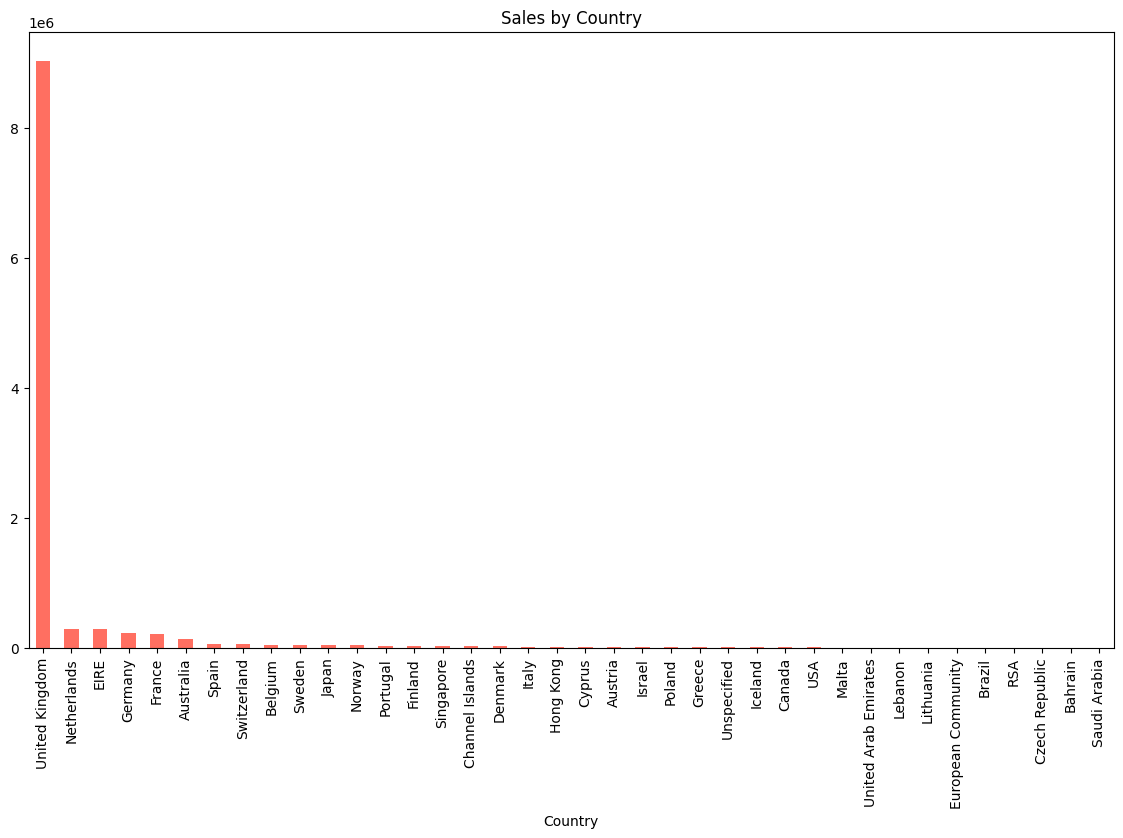

In [140]:
plt.figure(figsize=(14, 8))
invoice_summary.groupby('Country')['Total'].sum().sort_values(ascending=False).plot(kind='bar', title='Sales by Country',color='#FF6F61')

**CHART 2 - Daily Sales Trend** ( Throghout year )

<Axes: title={'center': 'Daily Sales'}, xlabel='InvoiceDate'>

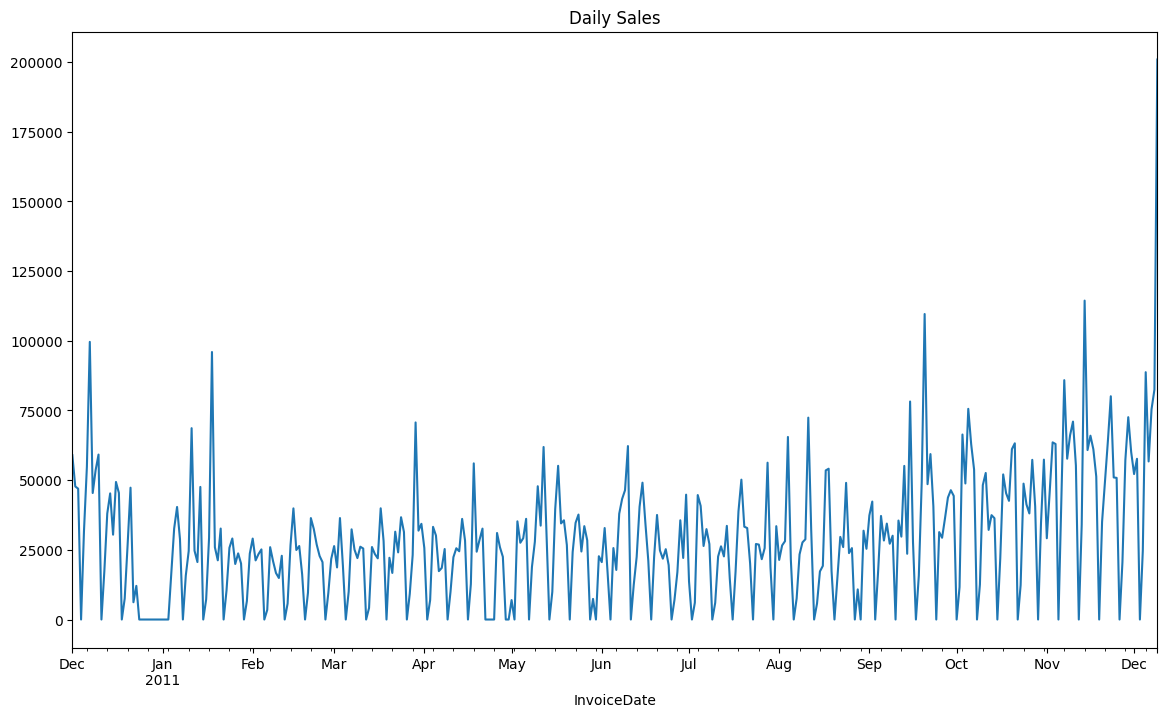

In [141]:
plt.figure(figsize=(14, 8))
invoice_summary.set_index('InvoiceDate').resample('D')['Total'].sum().plot(title='Daily Sales')

**Chart 3- Daily No of Transactions** ( Throghout year )

<Axes: title={'center': 'Daily Number of Transactions'}, xlabel='InvoiceDate'>

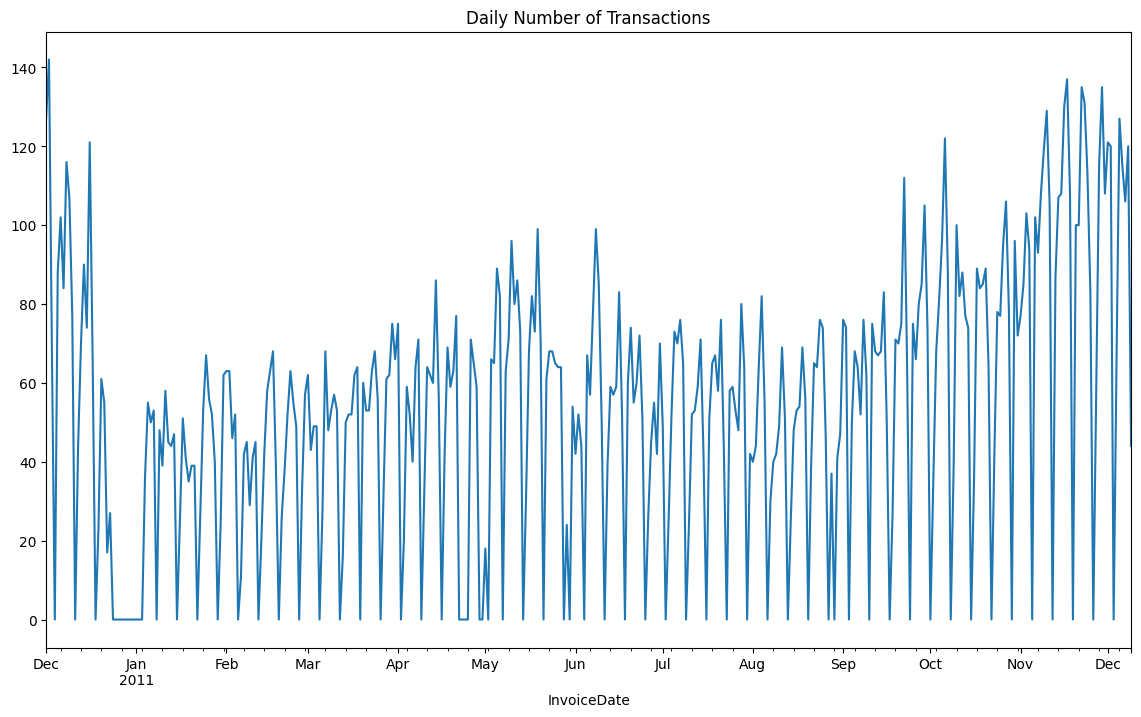

In [142]:
plt.figure(figsize=(14, 8))
invoice_summary.set_index('InvoiceDate').resample('D')['InvoiceNo'].nunique().plot(title='Daily Number of Transactions')

Chart 4- Daily Sales Trend line plot

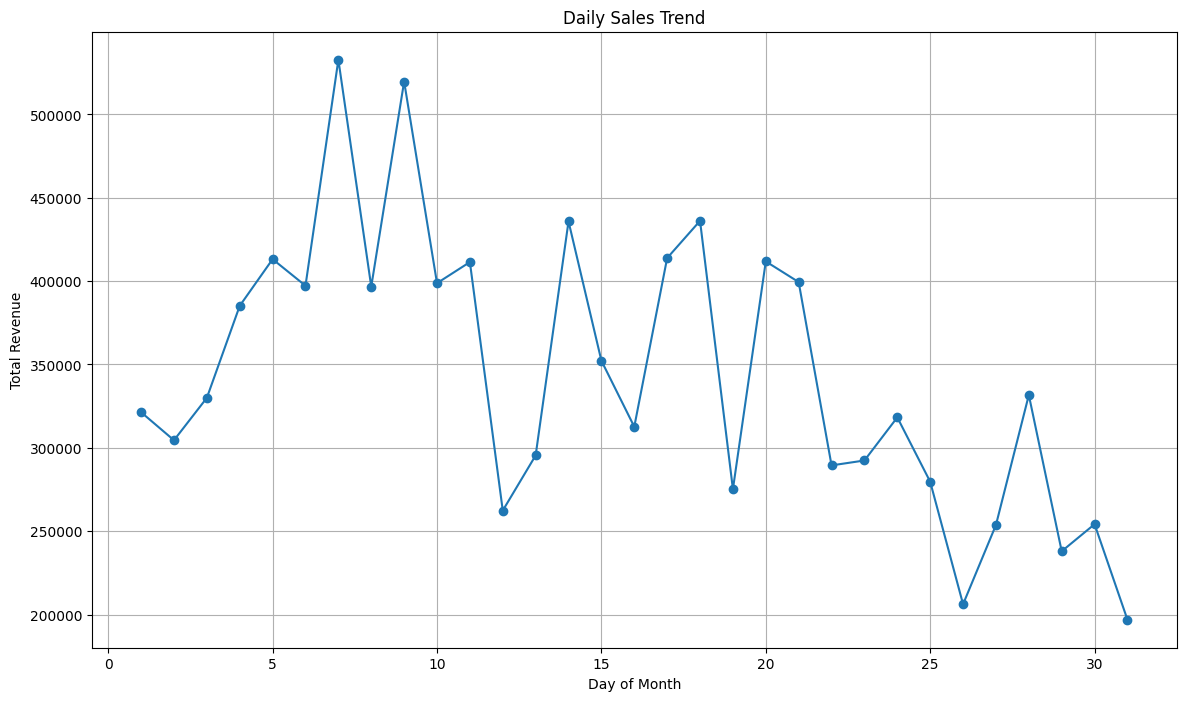

In [143]:
plt.figure(figsize=(14, 8))
invoice_summary.groupby('Day')['Total'].sum().plot(kind='line', marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Day of Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

**Chart 5 - Sales Heatmap (Day Vs Hour)**

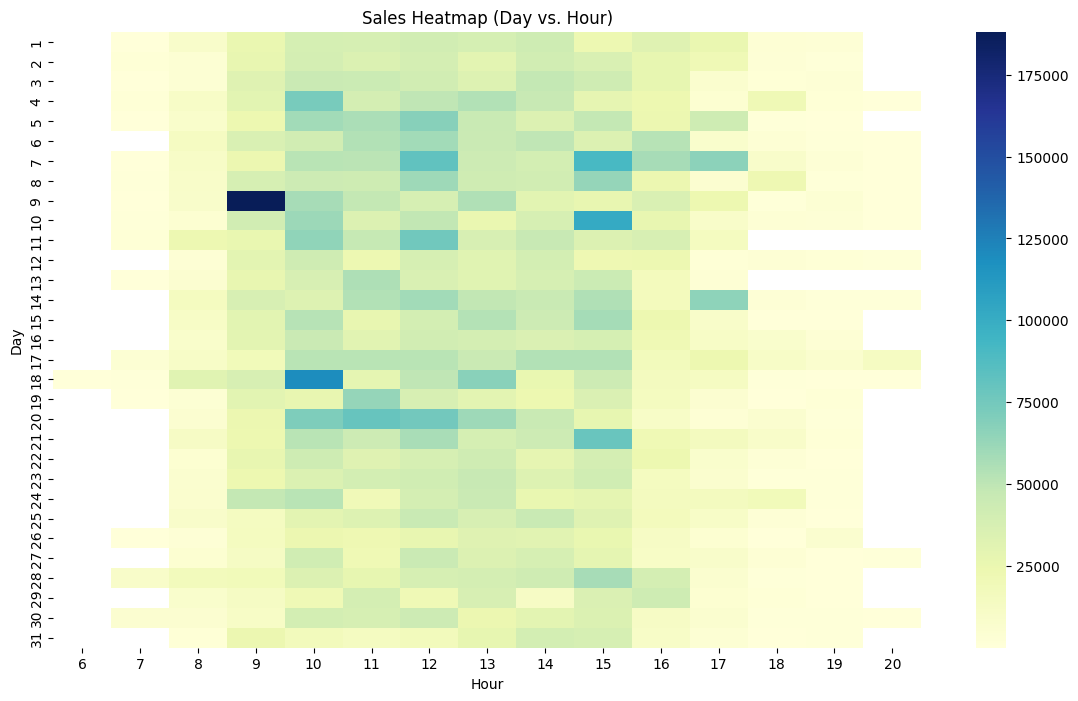

In [144]:
plt.figure(figsize=(14, 8))
pivot_table = invoice_summary.pivot_table(values='Total', index='Day', columns='Hour', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title("Sales Heatmap (Day vs. Hour)")
plt.show()

Chart 6 - Purchase Frequency Distribution

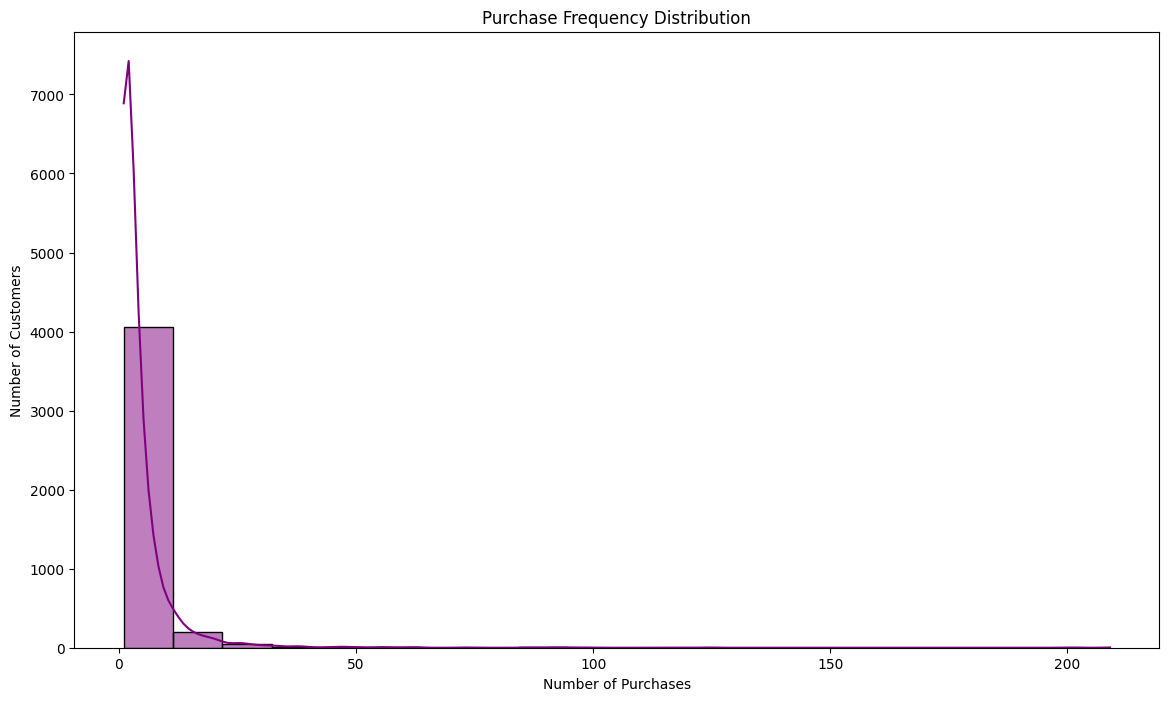

In [145]:
plt.figure(figsize=(14, 8))
purchase_counts = invoice_summary['CustomerID'].value_counts()
sns.histplot(purchase_counts, bins=20, kde=True, color='purple')
plt.title("Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()

**Chart 7 - Average Revenue per Order**

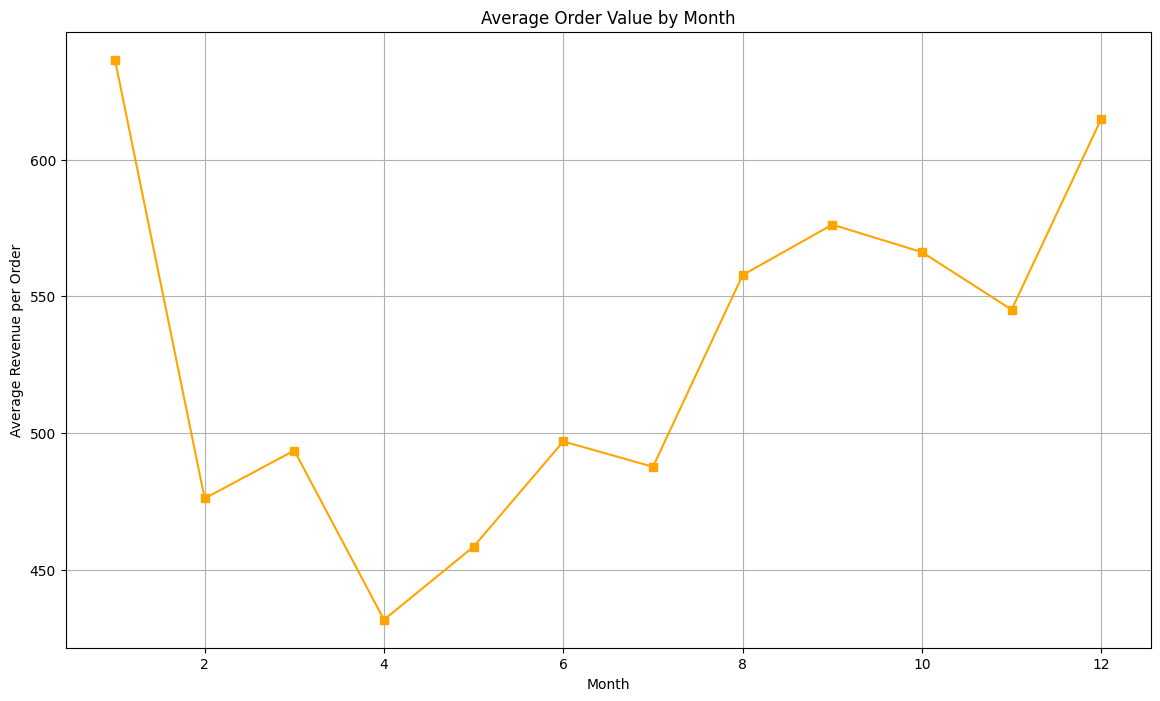

In [146]:
plt.figure(figsize=(14, 8))
invoice_summary.groupby('Month')['Total'].mean().plot(kind='line', marker='s', color='orange')
plt.title("Average Order Value by Month")
plt.xlabel("Month")
plt.ylabel("Average Revenue per Order")
plt.grid()
plt.show()

**Chart 8 - Invoice Totla Box Plot**

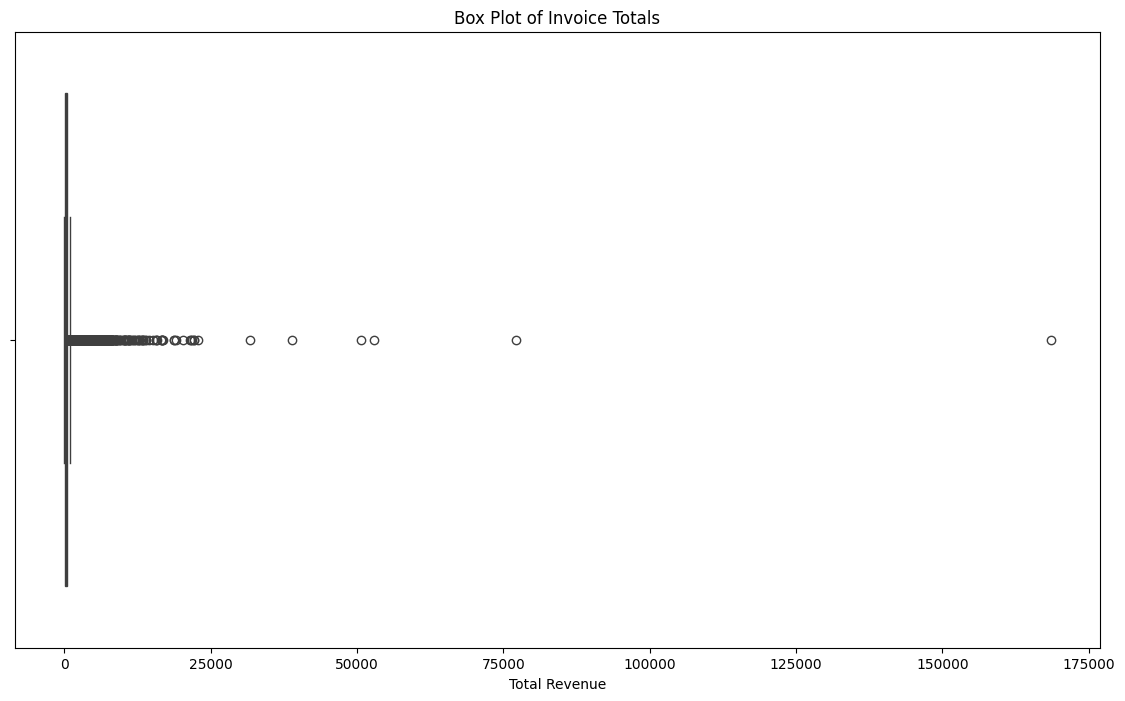

In [147]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=invoice_summary['Total'])
plt.title("Box Plot of Invoice Totals")
plt.xlabel("Total Revenue")
plt.show()

Chart 9- SUBPLOTS

<ipython-input-148-e04df8dec24a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=invoice_summary, ax=axes[0, 1], palette='viridis')


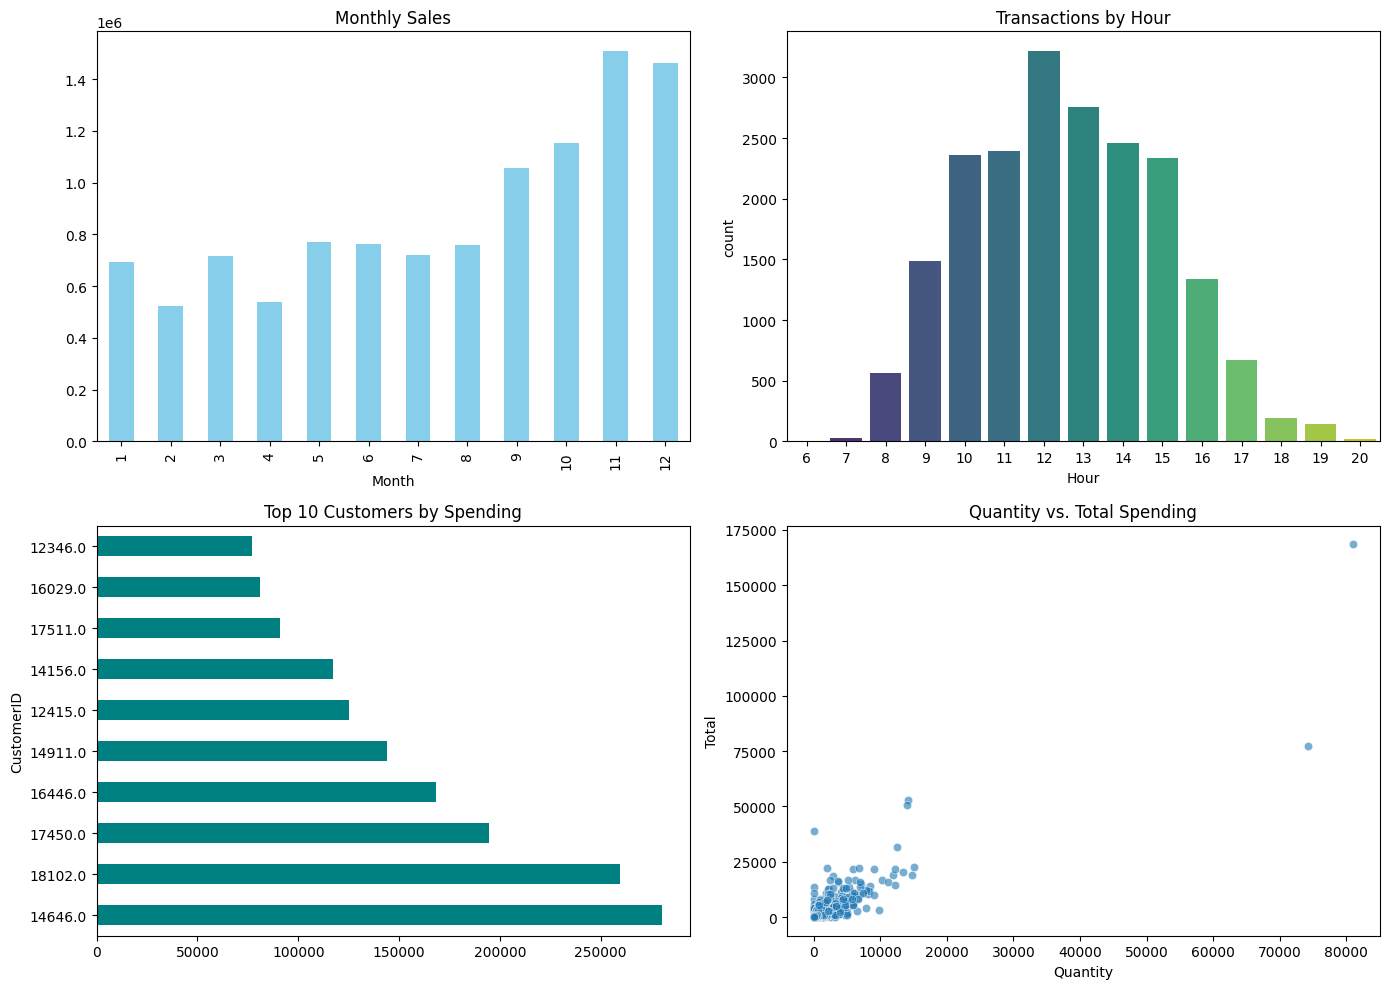

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Monthly Sales
invoice_summary.groupby('Month')['Total'].sum().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Monthly Sales")

# Plot 2: Hourly Transactions
sns.countplot(x='Hour', data=invoice_summary, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title("Transactions by Hour")

# Plot 3: Top Customers
top_customers.plot(kind='barh', ax=axes[1, 0], color='teal')
axes[1, 0].set_title("Top 10 Customers by Spending")

# Plot 4: Quantity vs. Total
sns.scatterplot(x='Quantity', y='Total', data=invoice_summary, ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title("Quantity vs. Total Spending")

plt.tight_layout()
plt.show()

**Chart 10 -Top 10 Frequently Bought Together Product Pairs'**

<ipython-input-149-dcbc2400a8ab>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pairs, y='Pair', x='Count', palette='rocket')


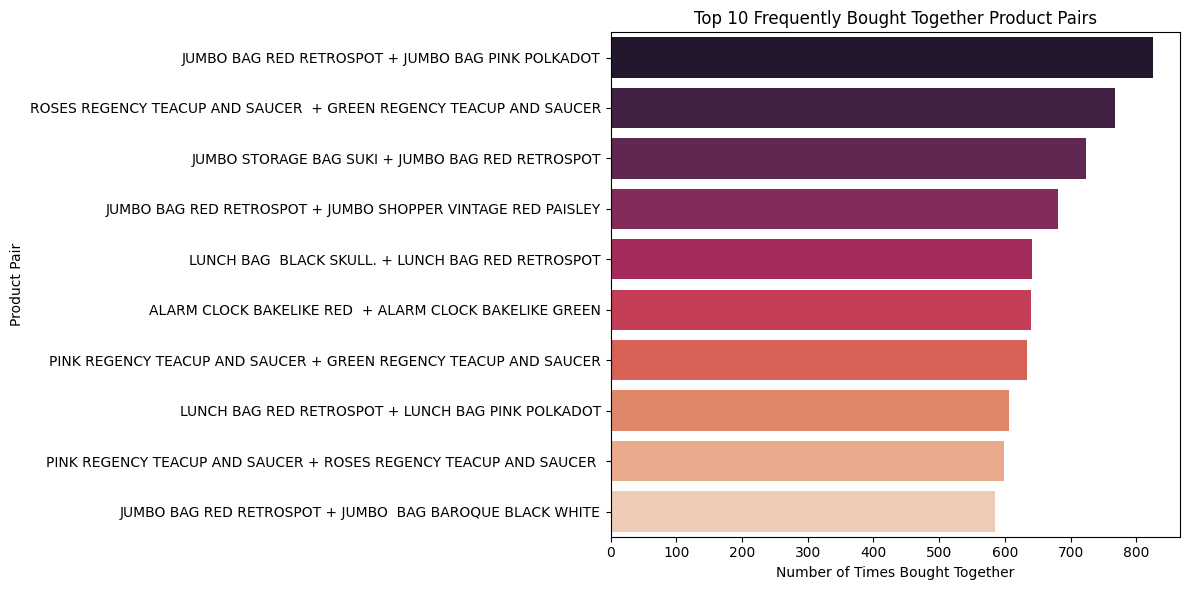

In [149]:
top_pairs.index.names = ['Item 1', 'Item 2']
top_pairs = top_pairs.reset_index(name='Count')

top_pairs['Pair'] = top_pairs['Item 1'] + ' + ' + top_pairs['Item 2']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pairs, y='Pair', x='Count', palette='rocket')
plt.title('Top 10 Frequently Bought Together Product Pairs')
plt.xlabel('Number of Times Bought Together')
plt.ylabel('Product Pair')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

## Step 1: Data Preparation

In [150]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')

# Load your data


# Basic cleaning of descriptions
def clean_text(text):
    # Remove stock codes if they appear in descriptions
    text = re.sub(r'[0-9]{1,2}[A-Z]{1,2}\d{0,2}[A-Z]*', '', str(text))
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text.strip()

df_copy['text'] = df_copy['Description'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
df_copy['text'].head()

,text
0,white hanging heart tlight holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart


##Step 2: Text Preprocessing

In [152]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df_copy['ProcessedText'] = df_copy['text'].apply(preprocess_text)



## Step 3: Feature Extraction with TF-IDF

In [153]:
tfidf_vectorizer = TfidfVectorizer(max_features=500,
                                  ngram_range=(1, 2),
                                  min_df=3,
                                  max_df=0.9)

tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['ProcessedText'])

## Step 4: Determine Optimal Number of Clusters

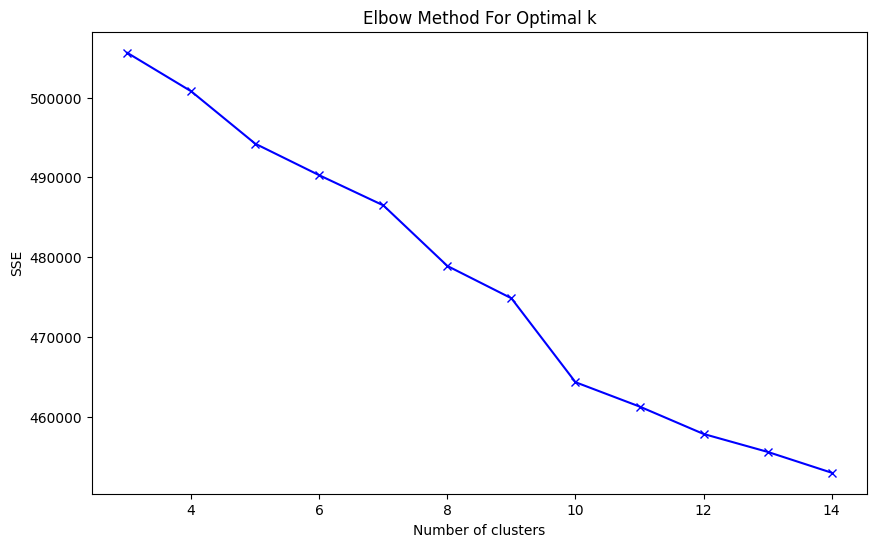

In [154]:
sse = []
for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(3, 15), sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

## Step 5: Apply K-Means Clustering

In [155]:
optimal_k = 10  #  based on  elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add clusters back to dataframe
df_copy['Cluster'] = clusters

## Step 6: Visualize Clusters

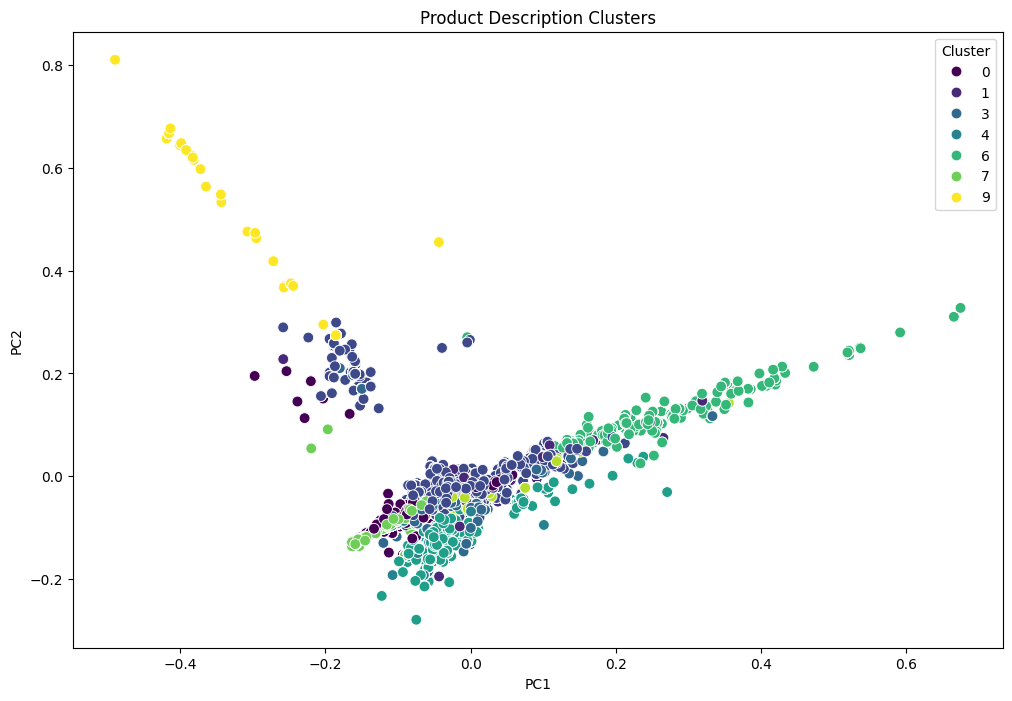

In [156]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Create dataframe for visualization
df_visualize = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
df_visualize['Cluster'] = clusters
df_visualize['Description'] = df_copy['Description']

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_visualize, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60)
plt.title('Product Description Clusters')
plt.show()

## Step 8: Business Insights Generation

In [157]:
# Print top terms per cluster
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print("Top terms:", ", ".join([terms[ind] for ind in order_centroids[i, :5]]))

    # Show some sample products from each cluster
    print("Sample products:")
    print(df_copy[df_copy['Cluster'] == i]['Description'].head(3).to_string(index=False))

Top terms per cluster:

Cluster 0:
Top terms: heart, decoration, heart decoration, wicker, small
Sample products:
CREAM CUPID HEARTS COAT HANGER
RED WOOLLY HOTTIE WHITE HEART.
   RECIPE BOX WITH METAL HEART

Cluster 1:
Top terms: pink, polkadot, pink polkadot, bag pink, bowl
Sample products:
ALARM CLOCK BAKELIKE PINK
  JUMBO BAG PINK POLKADOT
      GIRLY PINK TOOL SET

Cluster 2:
Top terms: box, design, vintage, mug, white
Sample products:
                WHITE METAL LANTERN
KNITTED UNION FLAG HOT WATER BOTTLE
             HAND WARMER UNION JACK

Cluster 3:
Top terms: christmas, vintage christmas, vintage, tree, star
Sample products:
PAPER CHAIN KIT 50'S CHRISTMAS 
PAPER CHAIN KIT 50'S CHRISTMAS 
  TRADITIONAL CHRISTMAS RIBBONS

Cluster 4:
Top terms: card, birthday, birthday card, travel card, wallet
Sample products:
VINTAGE HEADS AND TAILS CARD GAME 
           CREAM HEART CARD HOLDER
VINTAGE HEADS AND TAILS CARD GAME 

Cluster 5:
Top terms: set, tin, paper, pantry, cake
Sample produc

In [158]:
cluster_analysis = df_copy.groupby('Cluster').agg({
    'Quantity': 'sum',
    'Total': 'sum',
    'UnitPrice': 'mean',
    'Description': 'count'
}).rename(columns={'Description': 'ProductCount'})

print("\nCluster Business Analysis:")
print(cluster_analysis)

# Add cluster labels based on top terms
cluster_labels = {
    0: "Heart-themed Decorations",
    1: "Pink & Polkadot Items",
    2: "Vintage British Collection",
    3: "Christmas Seasonal Products",
    4: "Greeting Cards & Stationery",
    5: "Kitchen & Dining Sets",
    6: "Designer Shopping Bags",
    7: "Light Holders & Candles",
    8: "Baking Supplies",
    9: "Novelty Metal Signs"
}

df_copy['ClusterLabel'] = df_copy['Cluster'].map(cluster_labels)


Cluster Business Analysis:
         Quantity        Total  UnitPrice  ProductCount
Cluster                                                
0          305324   540783.190   2.609589         32918
1          277702   471247.810   2.798802         30331
2         2694325  5948859.184   5.224914        264940
3          289675   427803.790   2.316973         23053
4          211190   156399.810   1.045437         17067
5          499014  1079713.000   3.569898         57766
6          647274  1233787.960   2.707771         58470
7          251419   385401.620   2.062794         14401
8          274323   168831.660   0.972151         15210
9          138130   253856.520   2.262086         15948


In [159]:
exec_summary = df_copy.groupby('ClusterLabel').agg({
    'Total': ['sum', 'mean'],
    'Quantity': 'sum',
    'Description': 'count'
})

print("\nExecutive Summary:")
print(exec_summary)


Executive Summary:
                                   Total            Quantity Description
                                     sum       mean      sum       count
ClusterLabel                                                            
Baking Supplies               168831.660  11.100043   274323       15210
Christmas Seasonal Products   427803.790  18.557402   289675       23053
Designer Shopping Bags       1233787.960  21.101214   647274       58470
Greeting Cards & Stationery   156399.810   9.163872   211190       17067
Heart-themed Decorations      540783.190  16.428191   305324       32918
Kitchen & Dining Sets        1079713.000  18.691151   499014       57766
Light Holders & Candles       385401.620  26.762143   251419       14401
Novelty Metal Signs           253856.520  15.917765   138130       15948
Pink & Polkadot Items         471247.810  15.536837   277702       30331
Vintage British Collection   5948859.184  22.453609  2694325      264940


In [199]:
exec_summary.columns


exec_summary = exec_summary.loc[:, ~exec_summary.columns.duplicated()]

# Now rename
exec_summary.columns = [
     "index",
    'ClusterLabel',
    'Total_sum',
    'Total_mean',
    'Quantity_sum',
    'Description_count'
]

<ipython-input-205-864c8e23976d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




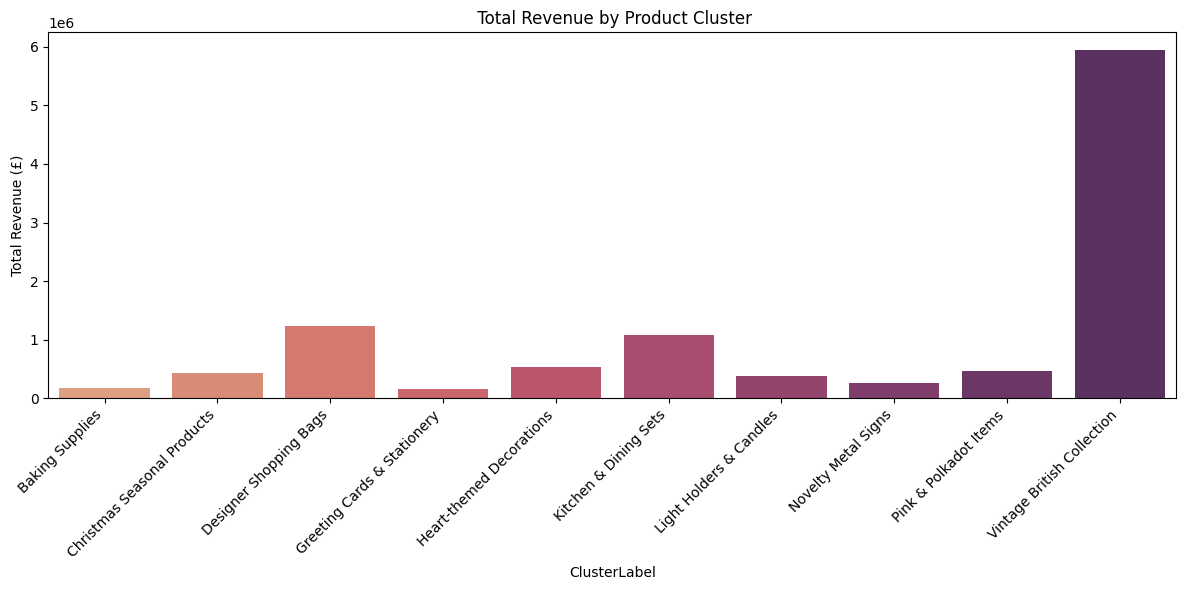

In [205]:

plt.figure(figsize=(12, 6))
sns.barplot(data=exec_summary, x='ClusterLabel', y='Total_sum', palette='flare')
plt.xticks(rotation=45, ha='right')
plt.title(' Total Revenue by Product Cluster')
plt.ylabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

<ipython-input-206-614cebeee3f5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




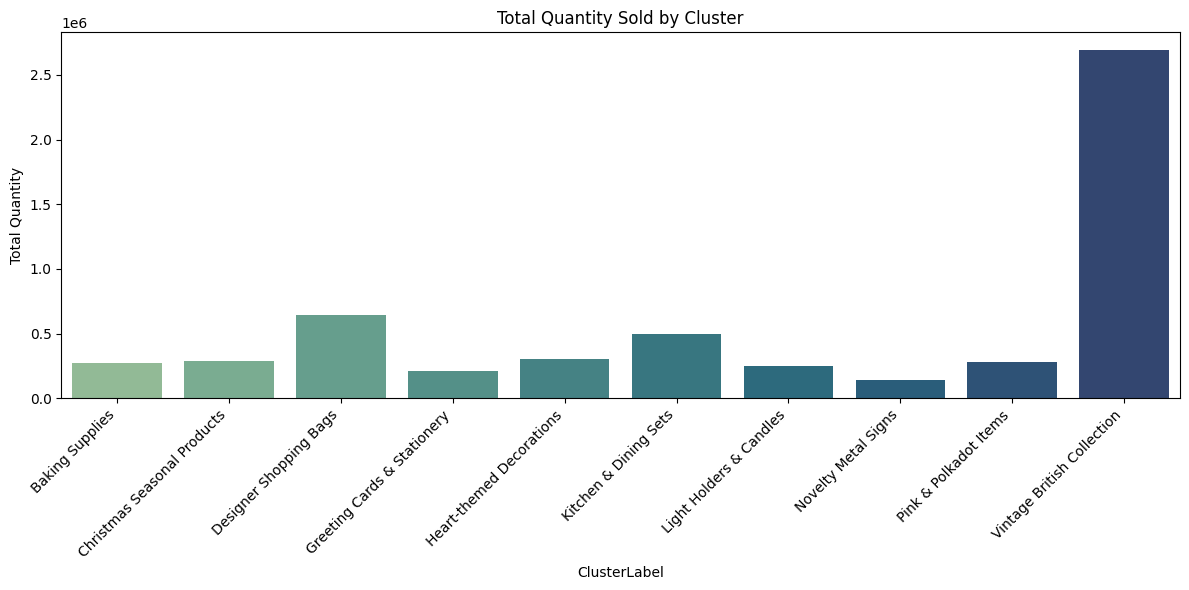

In [206]:
plt.figure(figsize=(12, 6))
sns.barplot(data=exec_summary, x='ClusterLabel', y='Quantity_sum', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Total Quantity Sold by Cluster')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***